# 3.3. 냉장고가 아이스크림을 자동으로 주문해 준다면

## 3.3.1. 데이터 수집하기

기상청의 공개 데이터와 네이버 데이터랩에서 기온 데이터, 아이스크림 쇼핑 클릭량 데이터를 수집한다.

## 3.3.2. 데이터 불러오기

In [1]:
import csv

f = open('temp_ice.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)

temp = []
ice = []

for row in data:
    temp.append(float(row[1]))
    ice.append(float(row[4]))

print(temp)
print(ice)

[-2.1, -2.5, -2.1, -0.7, 0.2, -1.3, -0.5, -0.7, -2.9, 0.5, 2.1, 3.0, 1.3, 1.0, 0.9, -3.2, 0.4, 0.8, 2.9, 1.6, 0.5, 2.6, 3.1, 0.7, -0.4, -1.8, -0.2, 2.6, 0.0, 3.5, 0.3, -1.3, 2.1, 5.6, 2.5, 2.9, 5.6, 2.1, -2.0, -1.7, -1.4, -0.8, 0.1, 0.3, 0.6, 2.0, -0.3, -0.2, 2.2, 2.9, 2.8, 2.7, 3.9, 5.0, 6.1, 6.0, 5.4, 7.1, 6.8, 6.0, 6.9, 8.7, 8.8, 8.2, 8.8, 6.5, 6.1, 7.9, 7.8, 6.4, 5.8, 3.9, 5.2, 5.8, 5.8, 6.6, 7.5, 10.7, 11.4, 9.8, 5.2, 4.2, 4.7, 7.2, 10.5, 12.8, 10.6, 10.6, 7.2, 5.4, 5.7, 6.7, 7.4, 9.9, 11.7, 11.6, 12.5, 11.8, 9.3, 7.2, 8.8, 10.7, 11.6, 10.2, 11.1, 14.2, 15.5, 15.3, 12.8, 14.7, 16.5, 17.6, 16.8, 17.3, 13.5, 9.4, 11.4, 12.1, 11.3, 14.6, 15.4, 16.0, 16.7, 17.6, 18.9, 14.0, 13.9, 15.7, 17.1, 17.6, 18.5, 18.4, 17.9, 19.8, 20.3, 21.4, 21.3, 18.8, 19.5, 17.0, 17.0, 19.2, 20.9, 22.9, 23.3, 23.2, 18.6, 17.8, 19.7, 20.5, 18.6, 18.9, 20.6, 22.0, 23.1, 22.9, 21.1, 18.6, 20.1, 19.7, 18.3, 18.8, 19.7, 21.2, 20.2, 20.4, 20.2, 21.3, 21.3, 22.2, 23.4, 22.8, 21.7, 21.6, 22.5, 23.6, 21.1, 23.8, 23.6

## 3.3.2. 데이터 다루기

* 변량 - 기온이나 점수, 나이 등과 같이 자료를 수량으로 나타낸 것.
* 계급 - -6.0 이상 ~ 0.0 미만 등과 같이 변량을 일정한 간격으로 나눈 구간.
* 계급의 크기 - 계급 구간의 너비.
  * 자료의 최댓값과 최솟값을 구한 후, 그 차를 계급의 개수로 나누어 구한다.
* 도수 - 각 계급에 속하는 자료의 수.
* 도수분포표 - 데이터를 계급과 도수로 나타낸 표.
  * 율(Yule)의 방법 - 경험적인 방법으로 계급 수를 보통 5~15개 정도로 잡는다.
  * 스터지(Sturges) 방법 - 자료 전체의 수를 N개, 계급의 수를 K개라고 할 때, $K \fallingdotseq 1 + log_2N$
* 계급값 - 각 계급의 가운데 값, $\text{(class mark)} = {\text{(sum of values both ends of class)} \over 2}$

In [5]:
import numpy as np

bins = np.arange(min(temp), max(temp) + 5, 5)
hist, _ = np.histogram(temp,bins)
print(hist)
print(bins)

[40 63 50 49 57 80 26]
[-3.8  1.2  6.2 11.2 16.2 21.2 26.2 31.2]


In [7]:
ice_buy = np.zeros(7)

for i in range(0, len(temp)):
    for j in range(0, len(bins)):
        if j == len(bins):
            ice_buy[j] = ice_buy[j] + ice[i]
        elif bins[j] <= temp[i] < bins[j + 1]:
            ice_buy[j] = ice_buy[j] + ice[i]

print(ice_buy)

[1098. 1782. 1469. 1632. 3198. 4337. 1616.]


In [10]:
ice_buy_a = np.zeros(7)

for i in range(0, len(ice_buy)):
    ice_buy_a[i] = ice_buy[i] / hist[i]
    print('%0.2f' % ice_buy_a[i])

27.45
28.29
29.38
33.31
56.11
54.21
62.15


## 3.3.4. 데이터 시각화하기

[-3.8  1.2  6.2 11.2 16.2 21.2 26.2 31.2]
[-3.8  1.2  6.2 11.2 16.2 21.2 26.2]


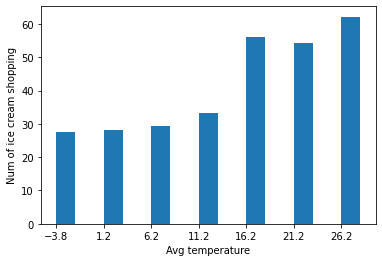

In [11]:
import matplotlib.pyplot as plt

plt.xlabel('Avg temperature')
plt.ylabel('Num of ice cream shopping')
plt.bar(bins[0:7], ice_buy_a, width=2, align='edge')
plt.xticks(bins[0:7])
plt.show()

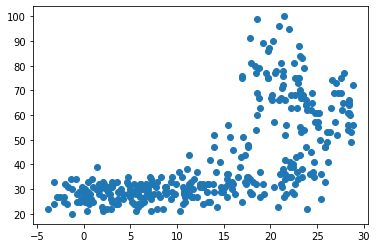

In [12]:
plt.scatter(temp, ice)
plt.show()

* 상관관계 - 일정한 수치로 계산되어 두 대상이 서로 관련성이 있다고 추측되는 관계.
* 상관도 - 두 변량의 값을 좌표평면 위에 나타낸 그림.
* 상관계수 - 두 변수 사이의 직선적인 관련 정도를 측정하기 위한 통계량.
  * 상관계수는 항상 `-1`과 `1` 사이의 값을 갖는다.
  * $r \gt 0$ - 양의 상관관계. 한쪽 변수가 증가할 때 다른 쪽 변수도 증가하는 경향.
  * $r \lt 0$ - 음의 상관관계. 한쪽 변수가 증가할 때 다른 쪽 변수는 감소하는 경향.
  * $r = 0$ - 두 변수는 무상관.

![](https://user-images.githubusercontent.com/6410412/106375195-73f7d780-63cd-11eb-941d-3a8ad6e7b11f.png)

## 3.3.5. 학습하기

* 먼저 모델을 만든다.
* 아이스크림 쇼핑 클릭량이 어떻게 변할지 예측해야 하기 때문에 회귀 모델을 만들어야 한다.
* 이때 선형회귀의 수학 개념을 이용해 예측함수를 정의한다.
* 비용 함수:
  * 예측 함수가 좋은지 아닌지 판단해주는 함수.
  * 평균제곱근 오차로 정의하고, 최적의 값을 찾기 위해 최소제곱법 알고리즘을 사용한다.

```
학습 데이터 구성 -> 예측 함수 정의 -> 비용 함수 적용
-> 비용이 임계값 이하라면 학습 종료
-> 비용이 임계값을 초과하면 다시 예측 함수를 정의
```

그리고 모델을 평가한다. 앞서 만든 모델을 이용해 문제를 해결하는 것.

```
평가 데이터 -> 학습 모델 적용 -> 예측 결과
```

### 3.3.5.1. 선형회귀 모델 이해

* 선형회귀 - 좌표평면 위에 표현된 데이터 간의 관계를 대표할 수 있는 직선의 함수식을 찾는 것.
* 선형회귀 모델 - 선형회귀를 통해 얻게 되는 일차식의 꼴을 갖는 함수 $f$.
* 모든 점을 지나는 직선 $f$가 있다면 가장 이상적인 선형회귀 모델이 되겠지만, 현실적으로 불가능하다.

### 3.3.5.2. 좋은 직선을 찾는 기준, 평균제곱근오차(RMSE, Root Mean Square Error)

* 좋은 직선 = 좋은 선형회귀 모델.
* 좋은 선형회귀 모델 $f$는 입력 변수에 따른 출력 변수의 예측값 $f(X)$가 실제 출력값 $Y$에 가장 가까운 값이 되도록 하는 모델.
* 모든 점을 동시에 지나지는 않지만, 가장 근접하게 지나가는 직선을 찾으면 된다.
* 단순히 오차의 합을 구하면 부호가 반대인 오차끼리 서로 상쇄되는 문제가 있다.
* 그래서 평균제곱근오차를 사용한다, $\sqrt{{1 \over n} \sum_{i=1}^n{\{Y_i - f(X_i)\}^2}}$
* 이처럼 크기를 최소화 해야 하는 값에 대한 함수를 선형회귀 모델의 비용함수라고 한다.
  * $\text{Cost}(\beta_0, \beta_1) = \sqrt{{1 \over n} \sum_{i=1}^n{\{Y_i - f(X_i)\}^2}}$
  * $\beta_0$는 선형회귀 모델 $f$의 y절편, $\beta_1$은 선형회귀 모델 $f$의 기울기를 의미.
  * 좋은 직선을 찾는 것은 $f$에 따른 예측값 $f(X)$와 실제 출력 값 $Y$의 평균제곱근오차가 최소가 되도록하는 두 수 $\beta_0, \beta_1$을 구하는 것이다.

### 3.3.5.3. 최소의 평균제곱근오차를 찾는 방법, 최소제곱법(LSM)

* 평균제곱근오차가 가장 작은 선형회귀 모델은 어떻게 찾을 수 있을까?
* 증가함수의 성질:
  * 임의의 두 실수 $x_1, x_2$에 대해 $x_1 \lt x_2$일 때, $f(x_1) \lt f(x_2)$이면 $f(x)$는 증가함수다.
  * 따라서 $f(x)$가 증가함수일 때, $m \leq x \leq M$이면 $f(m) \leq f(x) \leq f(M)$이다.
  * $y = \sqrt({1 \over 4} x)$는 증가함수이므로, $y$가 최소이려면 $x$가 최소이어야 한다.
* 따라서 평균제곱근오차가 최소려면 $\text{error}^2$들의 합이 최소가 되어야 한다.
  * 이러한 선형회귀 모델을 찾으면 된다.
  * 이렇게 데이터 사이의 $\text{error}^2$들의 합을 최소화하여 평균제곱근오차를 최소화하고, 실제 데이터의 분포를 가장 잘 나타내는 선형회귀 모델을 구하는 방법을 최소제곱법이라고 한다.

In [13]:
import pandas as pd

df = pd.read_csv('temp_ice.csv', encoding = 'euc-kr')
print(df.head(5))

           날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)  아이스크림/빙수
0  2019-01-01     -2.1     -5.8      2.1        27
1  2019-01-02     -2.5     -7.0      3.2        27
2  2019-01-03     -2.1     -7.7      5.0        25
3  2019-01-04     -0.7     -7.3      5.3        25
4  2019-01-05      0.2     -4.6      5.3        26


In [15]:
import numpy as np

data = np.array(df)
X = data[:, 1]
Y = data[:, -1]

print(X)
print(Y)

[-2.1 -2.5 -2.1 -0.7 0.2 -1.3 -0.5 -0.7 -2.9 0.5 2.1 3.0 1.3 1.0 0.9 -3.2
 0.4 0.8 2.9 1.6 0.5 2.6 3.1 0.7 -0.4 -1.8 -0.2 2.6 0.0 3.5 0.3 -1.3 2.1
 5.6 2.5 2.9 5.6 2.1 -2.0 -1.7 -1.4 -0.8 0.1 0.3 0.6 2.0 -0.3 -0.2 2.2 2.9
 2.8 2.7 3.9 5.0 6.1 6.0 5.4 7.1 6.8 6.0 6.9 8.7 8.8 8.2 8.8 6.5 6.1 7.9
 7.8 6.4 5.8 3.9 5.2 5.8 5.8 6.6 7.5 10.7 11.4 9.8 5.2 4.2 4.7 7.2 10.5
 12.8 10.6 10.6 7.2 5.4 5.7 6.7 7.4 9.9 11.7 11.6 12.5 11.8 9.3 7.2 8.8
 10.7 11.6 10.2 11.1 14.2 15.5 15.3 12.8 14.7 16.5 17.6 16.8 17.3 13.5 9.4
 11.4 12.1 11.3 14.6 15.4 16.0 16.7 17.6 18.9 14.0 13.9 15.7 17.1 17.6
 18.5 18.4 17.9 19.8 20.3 21.4 21.3 18.8 19.5 17.0 17.0 19.2 20.9 22.9
 23.3 23.2 18.6 17.8 19.7 20.5 18.6 18.9 20.6 22.0 23.1 22.9 21.1 18.6
 20.1 19.7 18.3 18.8 19.7 21.2 20.2 20.4 20.2 21.3 21.3 22.2 23.4 22.8
 21.7 21.6 22.5 23.6 21.1 23.8 23.6 21.6 23.8 23.2 23.4 23.1 24.4 25.1
 25.1 23.5 22.6 22.6 20.9 22.2 23.2 23.3 23.9 23.2 23.8 24.4 24.3 25.2
 24.8 24.8 27.0 27.9 26.8 26.6 26.5 27.1 26.9 27.8 28.4 28.4

기울기 $\beta_1$을 최소제곱법으로 구하기:

$\beta_1 = {{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})} \over {\sum_{i = 1}^n (X_i - \bar{X})^2}}$

y절편인 $\beta_0$은 다음과 같이 구한다:

$\beta_0 = \bar{Y} - \beta_1 \bar{X}$

In [17]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

temp1 = 0
temp2 = 0

for i in range(n):
    temp1 += (X[i] - mean_x) * (Y[i] - mean_y)
    temp2 += (X[i] - mean_x) ** 2

beta1 = temp1 / temp2
beta0 = mean_y - (beta1 * mean_x)

print('Beta1:', beta1)
print('Beta0:', beta0)

Beta1: 1.3695501118896156
Beta0: 22.845160616391098


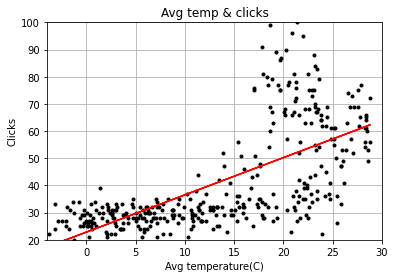

In [18]:
Y_pred = beta0 + beta1 * X

plt.title('Avg temp & clicks')
plt.xlabel('Avg temperature(C)')
plt.ylabel('Clicks')
plt.plot(X, Y, 'k.')
plt.plot(X, Y_pred, color='red')
plt.axis([-4, 30, 20, 100])
plt.grid()
plt.show()

$\text{RMSE} = \sqrt{\text{sum of }(\text{error})^2} = \sqrt{{1 \over n} \sum_{i = 1}^n \{Y_i - f(X_i)\}^2}$

In [19]:
def RMSE(b0, b1, x, y):
    return np.sqrt(((y - (b0 + b1 *x)) ** 2).mean())

print(RMSE(beta0, beta1, X, Y))

13.932934996027768


손실값은 13 정도였다.
평균 기온이 주어졌을 때 아이스크림 쇼핑 클릭량을 예측해보자.

In [20]:
def regression(b0, b1, x):
    return b0 + b1 * x

my_temp = float(input('Avg temp: '))
predicted_value = regression(beta0, beta1, my_temp)
print(predicted_value)

63.931663973079566
